# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


## Is the distribution of body temperatures normal?

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


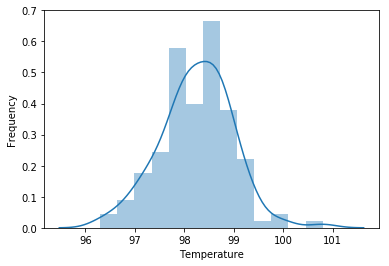

In [5]:
sns.distplot(df['temperature'])
plt.ylabel('Frequency')
plt.xlabel('Temperature');

Yes, the distribution seems quite normal from the graph above.

Lets have a look with an ECDF one dimensional graph

In [8]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

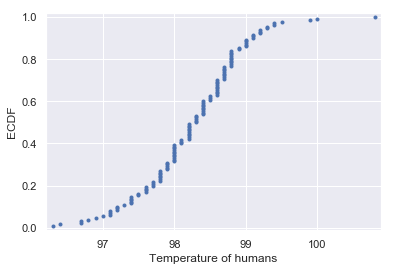

In [9]:
sns.set()
x,y = ecdf(df['temperature'])
_ = plt.plot (x, y, marker = '.', linestyle = 'none')
plt.margins(0.02)
_ = plt.xlabel('Temperature of humans')
_ = plt.ylabel('ECDF')
plt.show()

## Is the sample size large? Are the observations independent?

In [11]:
sample_temps = df['temperature']

if len(sample_temps) > 30:
    print("Sample size is equal to %.0f (n > 30), sample size is large." % len(df['temperature'], ))
else:
    print("Sample size is equal to %.0f (n <= 30), sample size is small." % len(df['temperature'], ))

Sample size is equal to 130 (n > 30), sample size is large.


## Is the true population mean really 98.6 degrees F?

In [12]:
def pop_mean_diff(data, pop_mean = 98.6):
    return np.mean(data) - pop_mean

In [14]:
replicas = np.empty(10000)

size = len(replicas)

for i in range(size):
    bs_sample = np.random.choice(sample_temps, len(sample_temps))
    replicas[i] = np.mean(bs_sample)
    
p_value = np.sum(replicas >= 98.6) / size

print('p-value: ',p_value)
print('Mean: ',np.mean(replicas))

p-value:  0.0
Mean:  98.24914061538462


### Frequentist Testing

Since there is only one dataset being used we will use one-sample hypothesis test. And since the standard deviation of the population is unknown we will use t-testing.

#### t-test

In [16]:
from scipy import stats
mean_temp = 98.6
result = stats.ttest_1samp(sample_temps, mean_temp)

print("t statistic = ", round(result.statistic,5))
print("p value = ", round(result.pvalue, 3))

t statistic =  -5.45482
p value =  0.0


with p value being 0, we can conclude that the null hypothesis can be rejected and there is no difference between sample mean and population mean.

#### z-test

In [50]:
temperatures =df.temperature.values
mean = np.mean(temperatures)


In [51]:
from scipy.stats import norm
std=np.std(temperatures)


In [53]:
z=(mean-98.6)/(std/np.sqrt(len(temperatures)))
print('z statistic: '+str(z))
#Caculate the P-Value: the probability the observed mean or more extreme occurs:
p_value=stats.norm.cdf(z)

print('p value is  '+
      str(p_value)+
      ' which is less than the significance level of 0.05. The Null Hypothesis may be rejected because of this.')

z statistic: -5.4759252020785585
p value is  2.1761575829356528e-08 which is less than the significance level of 0.05. The Null Hypothesis may be rejected because of this.


With a large sample size of 130, both z and t tests had similar results. 

### Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [54]:
#randomly draw a subset of the Temps sample with size 10.
Temps_Subset=np.random.choice(Temps,size=10)
mean_s=np.mean(Temps_Subset)
std_s=np.std(Temps_Subset)

z=(mean_s-98.6)/(std_s/np.sqrt(len(Temps_Subset)))

t=(mean_s-98.6)/(std_s/np.sqrt(len(Temps_Subset)))

In [56]:
z_val_p=stats.norm.cdf(z)
if z_val_p<0.05:
    print('for the z- test the p value of: '+
      str(z_val_p)+
      ' is less than the significance level of 0.05. The Null Hypothesis is thus rejected')
else:
    print('for the z- test the p value of: '+
      str(z_val_p)+
      ' is greater than the significance level of 0.05. The Null Hypothesis stands')

for the z- test the p value of: 0.05001707198954229 is greater than the significance level of 0.05. The Null Hypothesis stands


In [58]:
t_value_p=stats.t.cdf(t,len(Temps_Subset)-1)
if t_value_p<0.05:
    print('for the t- test the p value of: '+
      str(t_value_p)+
      ' is less than the significance level of 0.05. The Null Hypothesis is thus rejected')
else:
    print('for the t- test the p value of: '+
      str(t_value_p)+
      ' is greater than the significance level of 0.05. The Null Hypothesis stands')

for the t- test the p value of: 0.0672223781577338 is greater than the significance level of 0.05. The Null Hypothesis stands


The t-test p-value is higher than the z-test.
The t-test should be relied on more especially since the sample size is only 10 which is small.

### At what temperature should we consider someone's temperature to be "abnormal"?

To do this, we will use the bootstrap method again and build a confidence interval to get the normal temperature.

In [60]:
sample_observ=np.random.choice(temperatures,size=10000)

CI=np.percentile(sample_observ,[5,95])
print('Normal temperature would be between '+str(CI))

Normal temperature would be between [97.  99.3]


#### Frequentist

In [61]:
lb=stats.norm.ppf(0.05,loc=mean,scale=std)
up=stats.norm.ppf(0.95,loc=mean,scale=std)
CI=[lb,up]
print('With a signifcance level of 0.1 '+
     'a temperature is condidered normal if '+
      'it is within the interval '+str(CI))

With a signifcance level of 0.1 a temperature is condidered normal if it is within the interval [97.04789912762658, 99.45056241083492]


Both methods give similar results

### Is there a significant difference between males and females in normal temperature?

To find this, I will find the mean of each gender and subtract them.

In [66]:
def bs_replica_id(data, func):
    return func(np.random.choice(data, size=len(data)))

In [71]:
def reps_bs(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    replica = np.empty(size)

    # Generate replicates
    for i in range(size):
        replica[i] = bs_replica_id(data,func)

    return replica

In [72]:
male_temp=df[df['gender']=='M']['temperature'].values
female_temp=df[df['gender']=='F']['temperature'].values



bs_Mean_M=reps_bs(Temp_M,np.mean,10000)
bs_Mean_F=reps_bs(Temp_F,np.mean,10000)
bs_statistic=bs_Mean_F-bs_Mean_M

CI=np.percentile(bs_statistic,[2.5,97.5])

print('The 95% confidence interval for the statistc: Mean_F-Mean_M is '+
     str(CI)+' and we can conclude with 95% confidence that women have higher temperatures '+
      'than men')

The 95% confidence interval for the statistc: Mean_F-Mean_M is [0.04923077 0.53538462] and we can conclude with 95% confidence that women have higher temperatures than men
